# Hello, We Are EAA Corp.

Welcome to Employee Attrition Analysis Corp! Here we're doing great work in trying to figure out why people don't like your company so much. You've hired us to figure out why everyone is leaving, and by golly, that's what we're gonna do!

Thanks to this handy dandy [IBM HR Analytics dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset), we've got everything we need to get started.

## Part 1: Who's Quitting?! They're Fired!! (a.k.a. Initial Data Exploration)

### Look at the Data

Let's start by taking a peek at the data using several useful DataFrame methods:  
    - head(): returns the first 5 rows of data  
    - info(): provides the total number of rows, # of non-null values, and the attribute type

In [1]:
import pandas as pd
import pprint

pd.set_option('display.max_columns', 50) # necessary so pandas shows all rows

attrition = pd.read_csv('data/HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Luckily for us, it looks like the data is pretty clean! We know a lot about our quitters. There are 1470 values for all of the variables (as this was a generated data set, we'd expect nothing less), and there were no null values.

The next thing we'll want to do is look into are our categorical variables, as well as a quick check that none of our numerical variables are actually categorial - i.e. Type 1, Type 2, Type 3 doesn't mean 1 < 2 < 3. After double checking the list, it seems all the numerical values are as they should be!

### Check Data Values

Now, for the categorical variables: What are their values? And how are those values distributed? We can figure this out with another simple DataFrame method:  
    - value_counts(): counts the number of times a value appeared in a column

In [3]:
for column in attrition:
    if type(attrition[column].iloc[0]) == str:
        print(column)
        print(f'{attrition[column].value_counts()}\n')
    else:
        pass

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus

Several useful things can be gleaned from this simple step:  
  - The OverTime variable can be set as a binary 0/1 variable.
  - The Over18 variable can be thrown out, as the entire column only has 1 value.
  - Our Attrition variable (which is our target variable) is slightly skewed. This is important, as it could affect the performance of our model. We will come back to how to handle this later on in the notebook.

We'll drop the Over18 variable now, but the rest we'll leave for our Data Cleaning step later on.

In [4]:
attrition.drop('Over18',axis=1,inplace=True)

Now, let's use the describe() method to gain a similar look into our numerical variables:
    - describe(): provides descriptive statistics on all numerical variables in the dataset

In [5]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We notice a few more useful things from this step:
- EmployeeCount has a std of 0, meaning every value is the same. Time to drop it!
- StandardHours has the same problem: every value is 80. Drop it!

In case you're wondering why dropping columns is a good thing - in general, we want to remove as many useless, unhelpful columns as possible. This reduces the noise in the dataset. Having these useless rows is sort of like trying to listen to someone in a noisy crowd. You can do it, but it's easier if all those people not relevant to the conversation were gone.

In [6]:
attrition.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

And finally, let's use a histogram to get a better feel for the counts in the data.

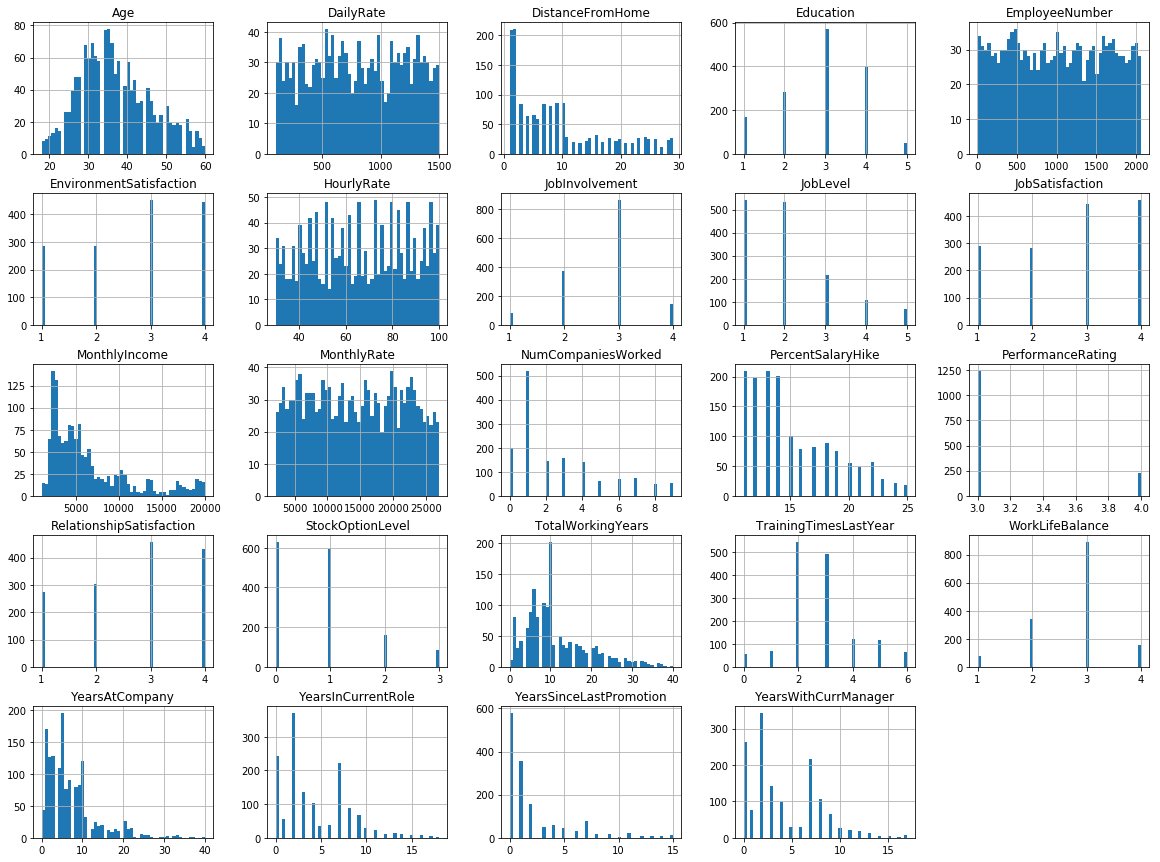

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
attrition.hist(bins=50, figsize=(20,15))
plt.show()

Histograms provide us with a great visualization into the distributions of the variables. In particular, some of these variables are tail-heavy, meaning they have long lists of low-count values stretching to the right. DistanceFromHome is a good example, as is YearsAtCompany. Some ML algorithms perform poorly with non-normal distributions of data, so we'll dig into potential transformations for these distributions later.

## Part 2: No Peeking! HR Only. (i.e. Create a Test Set)

### Why Have a Test Set?

A test set is an integral part of creating an effective model - without it, you won't have a good estimate of how your model will perform in real life.

### Can't Split Out Test Data at the End?

Well, no. We've done a preliminary check on what the data looks like, so we need to set aside some test data __now__. "Why so soon?" you whine. Well, the reason is simple: your brain is great at finding patterns. So great, in fact, that looking at some test data could bias you as to what kind of Machine Learning model to test. 

"Oh, this type of model would fit this test data great!" you could think, if I let you look at the test data. This is called _data snooping_ bias, and it causes your model to do better on the test set than it would in real life. That's bad. No snooping. 

### Isolate Your Test Set. Like Really. Really, Really Isolate It.

So, how do we choose a test set? First, we need to make sure that once we choose our test samples _we never touch them again until the end of the model creation process_. This means that regardless of updates to the data, starting and restarting the kernel, or anything else, those samples should be __untouchable__. 

Lucky for us IBM provided us with a handy EmployeeNumber! We can check whether it really is a unique identifier like so:

In [8]:
attrition.EmployeeNumber.nunique()

1470

There are 1470 data points and 1470 unique EmployeeNumbers. Perfect! Now, all we have to do is sample the data for our test set, and put those identified employees under lock and key till we've finished our model building and selection process.

### Sampling the Data

There are two primary ways we could go about sampling the data:
- __Random sampling__: Choose the test set samples completely randomly. Super easy. Could also lead to a skewed sample.
- __Stratified sampling__: Choose the test set samples after splitting the data into _strata_ and ensuring the right number of samples is chosen from each stratum to provide a _representative sample_.

For now, let's assume that experts have told us that DistanceFromHome is an important attribute in predicting attrition. We'll want to ensure that the test set is representative of the various categories of distances in the dataset.

To do that we'll create a DistanceFromHomeCat variable that splits the data up into buckets by distance, then use sklearn's StratifiedShuffleSplit class to split the data into a training and representative test set.

Then, we'll do a random splitting with sklearn's train_test_split method to see the difference in distribution.

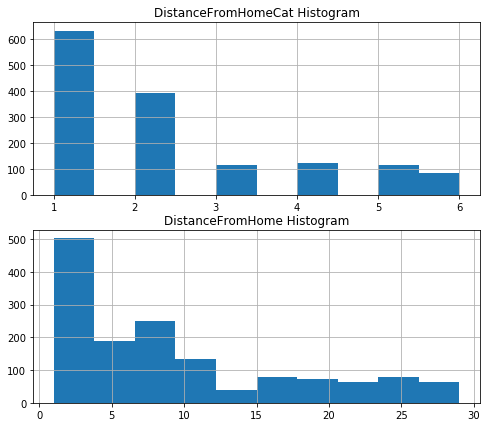

In [9]:
import numpy as np

attrition['DistanceFromHomeCat'] = np.ceil(attrition['DistanceFromHome'] / 5)
fig1 = plt.figure(1,figsize=(8,7))
fig1.add_subplot(211)
ax = attrition['DistanceFromHomeCat'].hist()
ax.set_title('DistanceFromHomeCat Histogram')
fig1.add_subplot(212)
ax = attrition['DistanceFromHome'].hist()
ax.set_title('DistanceFromHome Histogram')
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split
from IPython.display import display

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(attrition, attrition['DistanceFromHomeCat']):
    strat_train_set = attrition.loc[train_index]
    strat_test_set = attrition.loc[test_index]

random_train_set, random_test_set = train_test_split(attrition, test_size=0.2, random_state=42)

overall_distr = attrition['DistanceFromHomeCat'].value_counts() / len(attrition)
random_test_distr = random_test_set['DistanceFromHomeCat'].value_counts() / len(random_test_set)
strat_test_distr = strat_test_set['DistanceFromHomeCat'].value_counts() / len(strat_test_set)

display(pd.DataFrame({'Overall': overall_distr,
                      'Random': random_test_distr,
                      'Stratified': strat_test_distr,
                      'Rand % Error': 100 * (overall_distr - random_test_distr) / overall_distr,
                      'Strat % Error': 100 * (overall_distr - strat_test_distr) / overall_distr}))

,Overall,Rand % Error,Random,Strat % Error,Stratified
1.0,0.429932,-1.265823,0.435374,0.316456,0.428571
2.0,0.268027,-1.522843,0.272109,-0.253807,0.268707
4.0,0.085034,0.000000,0.085034,0.000000,0.085034
5.0,0.079592,-2.564103,0.081633,-2.564103,0.081633
3.0,0.078231,-4.347826,0.081633,0.000000,0.078231
6.0,0.059184,25.287356,0.044218,2.298851,0.057823


As you can see, the stratified dataset always has at least as good a distribution as the random state - and in the case of category 6, a much better representative sample than the random sampling.

Now let's take out the DistanceFromHomeCat we created to put the data back to how it was.

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('DistanceFromHomeCat', axis=1, inplace=True)

## Part 3: What Do We Have Here? (i.e. Data Discovery & Visualization)

Now it's time for us to play with our dataset, do some simple visualizations, and generally build some intuition around what kinds of models we should use/what hypotheses seem most likely.

Let's start by making a copy of our data so we can mess around without harming the training set.

In [12]:
play_set = strat_train_set.copy()
play_set.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Handling Multicollinearity

One important problem to handle is that of multicollinearity. Put simply, multicollinearity is when 2 predictor variables are highly correlated. 

Understanding why this is a problem is a bit more in depth, but for now it's enough to understand that correlated predictor variables can 'get in the way' of each other and other predictor variables. As [this blog post explains](http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis), it's sort of like having three people tackling a quarterback at the same time - you're not exactly sure who to give credit to.

Similarly, a model with correlated predictor variables doesn't know which variable to give credit to. That's a simplistic explanation, but it'll have to do for now!

Let's look at our highly correlated variables first.

In [13]:
# calculate a correlation matrix
corr_matrix = play_set.corr()

# select and print only highly correlated pairs of variables
highly_corr = []
for var in corr_matrix:
    for var2 in corr_matrix[var].index:
        if (corr_matrix.loc[var,var2] > 0.4) and (var != var2):
            highly_corr.append((var,var2,corr_matrix.loc[var,var2]))
        else:
            pass
pprint.pprint(sorted(highly_corr, key=lambda x: x[2], reverse=True))

[('JobLevel', 'MonthlyIncome', 0.95071304487711628),
 ('MonthlyIncome', 'JobLevel', 0.95071304487711628),
 ('JobLevel', 'TotalWorkingYears', 0.78456364572136272),
 ('TotalWorkingYears', 'JobLevel', 0.78456364572136272),
 ('MonthlyIncome', 'TotalWorkingYears', 0.77510309847919767),
 ('TotalWorkingYears', 'MonthlyIncome', 0.77510309847919767),
 ('YearsAtCompany', 'YearsWithCurrManager', 0.77081421865619515),
 ('YearsWithCurrManager', 'YearsAtCompany', 0.77081421865619515),
 ('PercentSalaryHike', 'PerformanceRating', 0.77063879497019194),
 ('PerformanceRating', 'PercentSalaryHike', 0.77063879497019194),
 ('YearsAtCompany', 'YearsInCurrentRole', 0.75624613647079331),
 ('YearsInCurrentRole', 'YearsAtCompany', 0.75624613647079331),
 ('YearsInCurrentRole', 'YearsWithCurrManager', 0.72603978730156893),
 ('YearsWithCurrManager', 'YearsInCurrentRole', 0.72603978730156893),
 ('Age', 'TotalWorkingYears', 0.67974878176850007),
 ('TotalWorkingYears', 'Age', 0.67974878176850007),
 ('TotalWorkingYears

Here, I've filtered out variables with correlations less than 0.4. There are still a lot of variables that are correlated! JobLevel and MonthlyIncome, TotalWorkingYears and JobLevel, PerformanceRating and PercentSalaryHike. All of these make clear intuitive sense. 

More exact methods of removing correlated variables are outside the scope of this notebook, so for now, we're just going to remove variables so we have no correlations greater than 0.8. 

This means we'll be dropping either JobLevel or MonthlyIncome. Since they're so highly correlated, it likely doesn't matter which, but I'm going to choose JobLevel.

In [14]:
play_set.drop('JobLevel',axis=1,inplace=True)
strat_train_set.drop('JobLevel',axis=1,inplace=True)
strat_test_set.drop('JobLevel',axis=1,inplace=True)

We can also make some nifty visualizations with correlation, although with so many variables, it can be hard to understand what's happening.

We'll select just a few to get a better grasp of things.

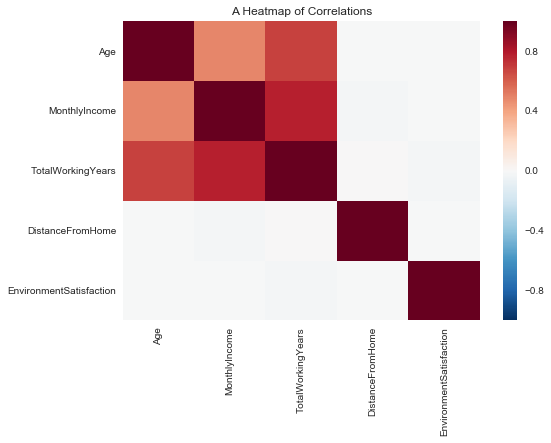

In [15]:
import seaborn as sns

# calculate correlation matrix
labels = ['Age','MonthlyIncome','TotalWorkingYears','DistanceFromHome','EnvironmentSatisfaction']
corr = play_set[labels].corr()

# plot a heatmap
ax = plt.axes()
sns.heatmap(corr)
ax.set_title('A Heatmap of Correlations')

### Experimenting with Attribute Combinations

# Add a random attribute combination and test with point biserial correlation. Then proceed to explain why it is necessary and different than df.corr()

In regression problems, we can perform some simple attribute combinations (MonthlyIncome / HourlyRate to get hours worked, for example) and test if they are highly correlated with the target variable. This works because the basic assumption of a linear model is what we've set out to test.

For classification problems, however, things are slightly more complicated. Linear correlation isn't meant to predict on binary (0/1) variables. There are ways of calculating '

Both for the convenience of this notebook, and because there aren't many combinations that would be more useful that the variables we have, we'll skip this step for now.

# insert code here about bipointserial correlation
https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient
https://stackoverflow.com/questions/29021380/is-there-a-way-to-test-correlation-between-data-x-and-binary-output-y

## Part 4: Aim...Fire (Everyone)! (i.e. Preparing the Data for ML Algorithms)

It's finally time to prepare the data for our ML algorithms! To begin with, we'll lay out a useful principle that will come in handy and allow you to build up a library of useful tools:
  - __Turn your data transformations into reusable functions.__  
 
You'll be performing many data transformations over time, so turn them into functions so you can easily plug and play different ones. Plus, at the end of it all, you'll have a whole set of tools at your disposal from your many different projects.

And remember: __fit all your transformations on your training set only__, not the full dataset. Only then can you use them to transform the full dataset (and new data).

To start, let's split the data into predictors and target, since we may not want to perform the same transformations in the predictors as the target variable.

In [108]:
predictors = strat_train_set.drop('Attrition',axis=1)
target = strat_train_set['Attrition'].copy()

### Data Cleaning
  
If your data is missing values, there are typically 2 ways to handle those values:  
1) Drop the rows  
2) Fill in the rows with some value, typically the median value of the dataset  

Pandas DataFrames have a number of quite useful functions built specifically for this purpose.

In [109]:
predictors.dropna(subset=['Age'])
predictors.drop('Age',axis=1)
median = predictors['Age'].median()
predictors['Age'].fillna(median, inplace=True)

In [110]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

unclean_data = predictors[['Age','DistanceFromHome']].copy()
unclean_data.iloc[4,:] = [np.nan,np.nan]
display(unclean_data.head())
imputer.fit(predictors[['Age','DistanceFromHome']])

,Age,DistanceFromHome
1197,20.0,9.0
845,40.0,26.0
590,33.0,7.0
1065,55.0,4.0
467,NaN,NaN


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [111]:
imputer.statistics_

array([ 36.,   7.])

In [112]:
unclean_data.median()

Age                 36.0
DistanceFromHome     7.0
dtype: float64

In [113]:
X = imputer.transform(predictors[['Age','DistanceFromHome']])
clean_predictors = pd.DataFrame(X, columns = ['Age','DistanceFromHome'])

display(clean_predictors.head())

,Age,DistanceFromHome
0,20.0,9.0
1,40.0,26.0
2,33.0,7.0
3,55.0,4.0
4,37.0,9.0


### Handling Text and Categorical Attributes


In [114]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()
cat_data = predictors['Department']
cat_data_encoded = encoder.fit_transform(cat_data)
display(cat_data_encoded)

array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [115]:
encoder.classes_

array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)

In [116]:
encoder = OneHotEncoder()
cat_data_onehot = encoder.fit_transform(cat_data_encoded.reshape(-1,1))
print(cat_data_onehot) # SciPy sparse matrix that saves space when lots of zeros in a matrix
print(cat_data_onehot.toarray()) # Converts to actual np.array

  (0, 2)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 2)	1.0
  (12, 1)	1.0
  (13, 2)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (1151, 2)	1.0
  (1152, 2)	1.0
  (1153, 1)	1.0
  (1154, 1)	1.0
  (1155, 2)	1.0
  (1156, 1)	1.0
  (1157, 1)	1.0
  (1158, 2)	1.0
  (1159, 2)	1.0
  (1160, 1)	1.0
  (1161, 1)	1.0
  (1162, 1)	1.0
  (1163, 1)	1.0
  (1164, 1)	1.0
  (1165, 2)	1.0
  (1166, 2)	1.0
  (1167, 1)	1.0
  (1168, 2)	1.0
  (1169, 1)	1.0
  (1170, 1)	1.0
  (1171, 1)	1.0
  (1172, 1)	1.0
  (1173, 1)	1.0
  (1174, 2)	1.0
  (1175, 2)	1.0
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 ..., 
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


In [117]:
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer(sparse_output=True) # Sparse output returns a SciPy sparse matrix if True
cat_data_onehot = encoder.fit_transform(cat_data)
print(cat_data_onehot)
print(cat_data_onehot.toarray())

  (0, 5)	1
  (0, 6)	1
  (0, 10)	1
  (0, 8)	1
  (0, 16)	1
  (1, 6)	1
  (1, 10)	1
  (1, 8)	1
  (1, 16)	1
  (1, 4)	1
  (1, 15)	1
  (1, 7)	1
  (1, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 19)	1
  (1, 13)	1
  (1, 14)	1
  (1, 11)	1
  (1, 12)	1
  (1, 17)	1
  (2, 6)	1
  (2, 10)	1
  (2, 8)	1
  :	:
  (1173, 8)	1
  (1173, 16)	1
  (1173, 4)	1
  (1173, 15)	1
  (1173, 7)	1
  (1173, 9)	1
  (1173, 0)	1
  (1173, 1)	1
  (1173, 2)	1
  (1173, 19)	1
  (1173, 13)	1
  (1173, 14)	1
  (1173, 11)	1
  (1173, 12)	1
  (1173, 17)	1
  (1174, 5)	1
  (1174, 6)	1
  (1174, 10)	1
  (1174, 8)	1
  (1174, 16)	1
  (1175, 5)	1
  (1175, 6)	1
  (1175, 10)	1
  (1175, 8)	1
  (1175, 16)	1
[[0 0 0 ..., 0 0 0]
 [1 1 1 ..., 1 0 1]
 [1 1 1 ..., 1 0 1]
 ..., 
 [1 1 1 ..., 1 0 1]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


### Custom Transformers

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

hourlyrate_ix, monthlyincome_ix = 10, 15

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_hours_worked = True): # no *args or **kargs
        self.add_hours_worked = add_hours_worked
    def fit(self, X, y=None):
        return self # nothing else to do because we're just adding a column with this adder
    def transform(self, X, y=None):
        hours_worked = X[:,monthlyincome_ix] / X[:,hourlyrate_ix]
        if self.add_hours_worked:
            return np.c_[X, hours_worked]
        else:
            return np.c_[X]

In [119]:
attr_adder = CombinedAttributesAdder(add_hours_worked=True)
predictors_extra_attribs = attr_adder.transform(predictors.values)
print(predictors.values,'\n\n')
print(predictors_extra_attribs)

[[20 'Travel_Rarely' 727 ..., 2 0 2]
 [40 'Travel_Frequently' 902 ..., 1 0 0]
 [33 'Travel_Rarely' 213 ..., 9 3 7]
 ..., 
 [44 'Travel_Rarely' 477 ..., 6 5 17]
 [19 'Travel_Rarely' 419 ..., 0 0 0]
 [60 'Travel_Frequently' 1499 ..., 13 13 11]] 


[[20 'Travel_Rarely' 727 ..., 0 2 50.51851851851852]
 [40 'Travel_Frequently' 902 ..., 0 0 48.06521739130435]
 [33 'Travel_Rarely' 213 ..., 3 7 238.59183673469389]
 ..., 
 [44 'Travel_Rarely' 477 ..., 5 17 244.0]
 [19 'Travel_Rarely' 419 ..., 0 0 57.32432432432432]
 [60 'Travel_Frequently' 1499 ..., 13 11 128.325]]


### Feature Scaling

In [120]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print(predictors.values[:,-1],'\n\n')
scaler = MinMaxScaler()
print(scaler.fit_transform(predictors.values[:,-1].reshape(-1,1)))

[2 0 7 ..., 17 0 11] 


[[ 0.11764706]
 [ 0.        ]
 [ 0.41176471]
 ..., 
 [ 1.        ]
 [ 0.        ]
 [ 0.64705882]]


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [121]:
print(predictors.values[:,-1],'\n\n')
scaler = StandardScaler()
print(scaler.fit_transform(predictors.values[:,-1].reshape(-1,1)))

[2 0 7 ..., 17 0 11] 


[[-0.58585786]
 [-1.14920115]
 [ 0.82250037]
 ..., 
 [ 3.63921682]
 [-1.14920115]
 [ 1.94918695]]


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Transformation Pipelines

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class MyBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return pd.get_dummies(X, columns = self.attribute_names)
    
num_attribs = list(predictors.drop(['BusinessTravel','Department','EducationField',
                               'Gender','JobRole','MaritalStatus','OverTime'],axis=1).columns)
cat_attribs = ['BusinessTravel','Department','EducationField',
               'Gender','JobRole','MaritalStatus','OverTime']
    
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('attribs_adder', CombinedAttributesAdder()),
    ('imputer', Imputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('binarizer', MyBinarizer(cat_attribs)),
])

In [123]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [124]:
predictors_prepared = full_pipeline.fit_transform(predictors)
print(predictors_prepared)
print(predictors_prepared.shape)

[[-1.86183257 -0.18950701 -0.02043906 ...,  1.          1.          0.        ]
 [ 0.3382429   0.24616562  2.08583815 ...,  0.          0.          1.        ]
 [-0.43178352 -1.46913978 -0.26823638 ...,  0.          1.          0.        ]
 ..., 
 [ 0.77825799 -0.81189649 -0.26823638 ...,  0.          1.          0.        ]
 [-1.97183635 -0.95629085  1.46634485 ...,  1.          0.          1.        ]
 [ 2.53831836  1.7324317   2.33363547 ...,  0.          1.          0.        ]]
(1176, 75)


In [152]:
target_prepared = pd.DataFrame([1 if sample ==  'Yes' else 0 for sample in target],columns=['Attrition'])
target_prepared = target_prepared.values.reshape(-1,)

    Question: How do you find the label names?

## Part 5: Models, Models Everywhere (i.e. Selecting and Training a Model)

In [155]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(predictors_prepared,target_prepared)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [156]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, predictors_prepared, target_prepared, cv=3, scoring='accuracy')

array([ 0.84223919,  0.83163265,  0.84398977])

In [160]:
# Seems great, but a really dumb classifier that just placed everything as 0 would have 
# an equally high 'accuracy'! This is why we don't usually use accuracy
1 - sum(target_prepared) / len(target_prepared)

0.84353741496598644

In [161]:
# Get predictions by CV models that never saw the data they predicted on
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, predictors_prepared, target_prepared, cv=3)

In [162]:
from sklearn.metrics import confusion_matrix

# True Negatives, False Positives
# False Negatives, True Positives
confusion_matrix(target_prepared, y_train_pred)

array([[987,   5],
       [184,   0]])